In [1]:
import gefera as gf

['orbits.py', 'animate.py', '__pycache__', 'keplib.cpython-310-x86_64-linux-gnu.so', 'conflib.cpython-310-x86_64-linux-gnu.so', 'phot.py', 'reparam.py', '__init__.py', 'hrchlib.cpython-310-x86_64-linux-gnu.so', 'photlib.cpython-310-x86_64-linux-gnu.so', 'systems.py', 'kep.py', '.ipynb_checkpoints', 'grad_reparam.py']


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from test_reparam import *
from test_grad_reparam import *

In [3]:
Pi = np.pi

In [7]:
p_transit = {
'ap':215.0,     #semi-major axis
'tp':-91.25,    #time of periastron passage
'ep':0.1,       #eccentricity
'pp':365,       #orbital period
'wp':0.1*np.pi / 180,    #argument of periastron
'ip':89.8 * np.pi / 180,   #inclination
'am':2,
'tm': -4.2,
'em' : 0.1,
'pm' : 8,
'om' :90 * np.pi / 180,    #longitude of asending node (in radians)
'wm' : -90 * np.pi / 180,
'im' : 90.0 * np.pi / 180,
'mm' : 0.0,    #moon/planet mass ratio
'rp' : 0.1,
'rm' : 0.0,
'u1' : 0.5,
'u2' : 0.3
}


In [8]:
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = p_transit.values()

In [9]:
new_params = {
    'T':def_T(p_transit['ep'],p_transit['pp'],p_transit['wp'],p_transit['ap'],p_transit['ip']),
    't0':t0(p_transit['ep'],p_transit['wp'],p_transit['pp'],p_transit['tp']),
    'b1':b(p_transit['ap'],p_transit['ip'],p_transit['ep'],p_transit['wp']),
    'r1':p_transit['rp'],
    'phi':phi(p_transit['tm'],p_transit['pm']),
    'm2':p_transit['mm'],
    'r2':p_transit['rm'],
    'a2':p_transit['am'],
    'b2':b(p_transit['am'],p_transit['im'],p_transit['em'],p_transit['wm']),
    'P1':p_transit['pp'],
    'P2':p_transit['pm'],
    'e1cosw1':p_transit['ep']*np.cos(p_transit['wp']),
    'e2cosw2':p_transit['em']*np.cos(p_transit['wm']),
    'e1sinw1':p_transit['ep']*np.sin(p_transit['wp']),
    'e2sinw2':p_transit['em']*np.sin(p_transit['wm']),
    'o2':p_transit['om'],
    'u1':p_transit['u1'],
    'u2':p_transit['u2']

}

In [10]:
T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = new_params.values()

In [11]:
new_params

{'T': 0.359889361609616,
 't0': -171.0009714536869,
 'b1': 0.7428555010526576,
 'r1': 0.1,
 'phi': -3.2986722862692828,
 'm2': 0.0,
 'r2': 0.0,
 'a2': 2,
 'b2': 1.3471114790620885e-16,
 'P1': 365,
 'P2': 8,
 'e1cosw1': 0.09999984769132877,
 'e2cosw2': 6.123233995736766e-18,
 'e1sinw1': 0.0001745328365898309,
 'e2sinw2': -0.1,
 'o2': 1.5707963267948966,
 'u1': 0.5,
 'u2': 0.3}

In [8]:
e2cosw

6.123233995736766e-18

In [9]:
#First test: just add 0.001 to p1
#Second test: define new T and new t0 using p1+0.001
#fixed second test: only define new T because t0 has to be the same for both transits
#these tests are for the second transit

In [10]:
#baseline
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t2 = np.linspace(-172+p1,-170+p1,10000)
flux, grad = sys.lightcurve(t2, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

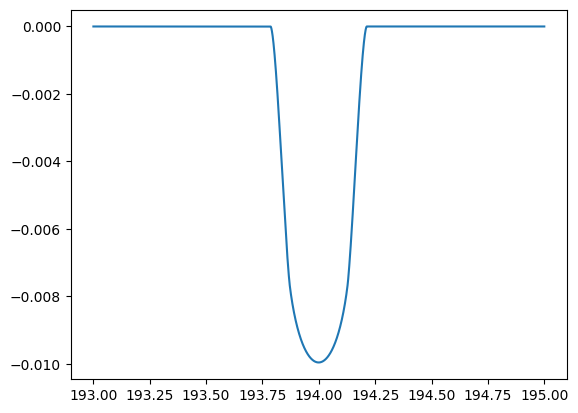

In [11]:
plt.plot(t2,flux)

In [12]:
#first test
po1 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+0.001,b1)
mo1 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys1 = gf.systems.HierarchicalSystem(po1, mo1)
t2 = np.linspace(-172+p1,-170+p1,10000)
flux1, grad1 = sys1.lightcurve(t2, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)
#dfdP = grad1['P1'] - grad1['T']*dTdp(pp,ap,wp,ep,ip) - grad1['t0']*dt0dp(tp,ep,pp,wp)

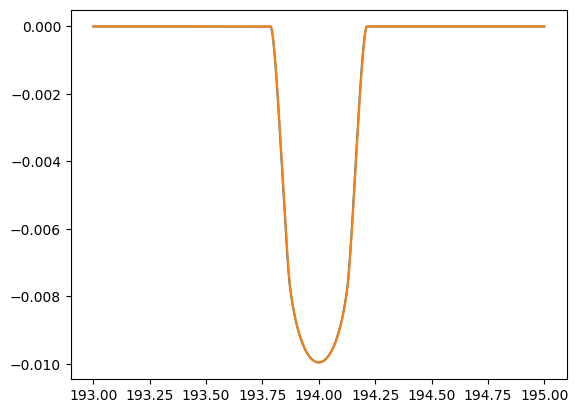

In [13]:
plt.plot(t2,flux)
plt.plot(t2,flux1)

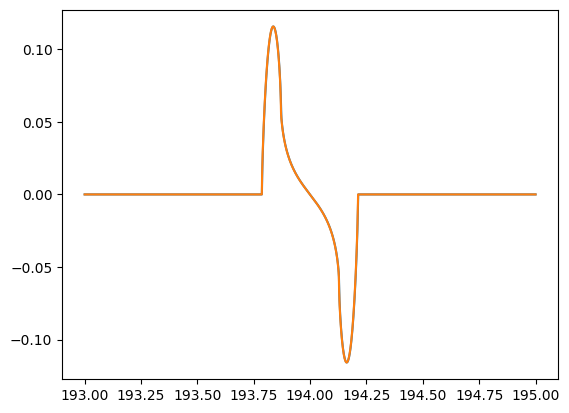

In [15]:
plt.plot(t2,(flux1-flux)/0.001)
plt.plot(t2,grad['P1'])

In [15]:
#second test
new_T = def_T(ep,p1+0.001,wp,ap,ip)
po2 = gf.orbits.PrimaryOrbit(new_T,my_t0,e1sinw,e1cosw,p1+0.001,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t2 = np.linspace(-172+p1,-170+p1,10000)
flux2, grad2 = sys2.lightcurve(t2, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

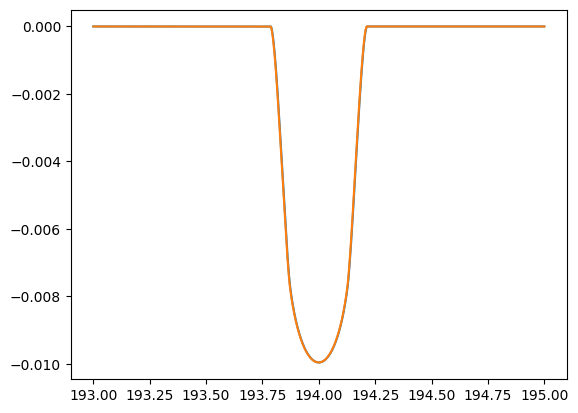

In [16]:
plt.plot(t2,flux2)
plt.plot(t2,flux)

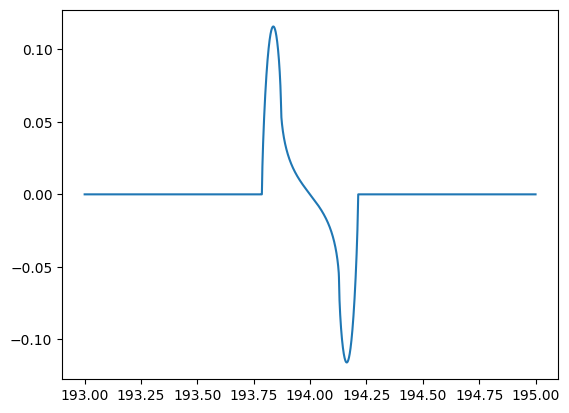

In [17]:
plt.plot(t2,(flux2-flux)/0.001)

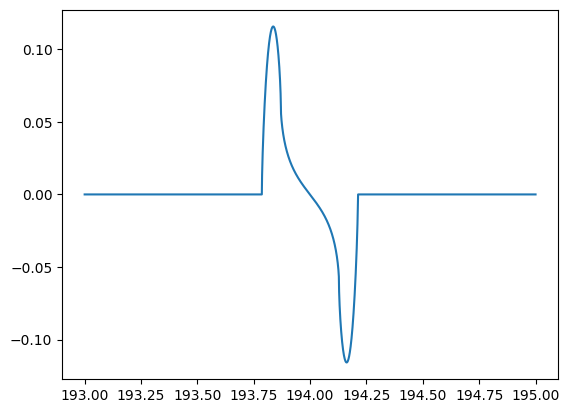

In [18]:
plt.plot(t2,grad['P1'])

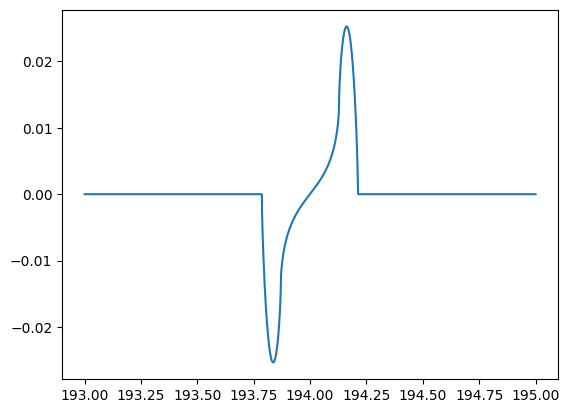

In [19]:
#how about this expression?
dfdP = grad['T']*dTdp(pp,ap,wp,ep,ip) + grad['t0']*dt0dp(tp,ep,pp,wp)
t2 = np.linspace(-172+p1,-170+p1,10000)
plt.plot(t2,dfdP)

#no

In [20]:
#first transit

In [9]:
#baseline, new t range
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t1 = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t1, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

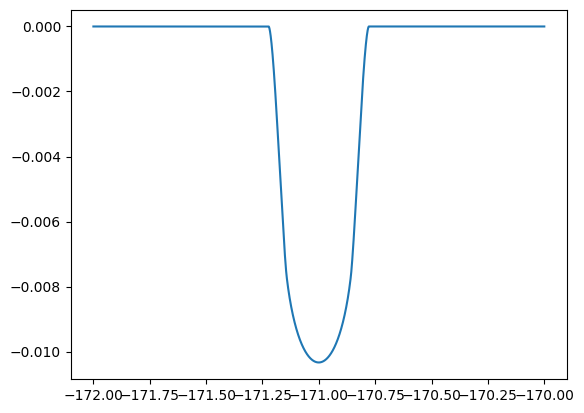

In [10]:
plt.plot(t1,flux)

In [23]:
#new T, same t0, first transit
new_T = def_T(ep,p1+0.001,wp,ap,ip)
po3 = gf.orbits.PrimaryOrbit(new_T,my_t0,e1sinw,e1cosw,p1+0.001,b1)
mo3 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys3 = gf.systems.HierarchicalSystem(po3, mo3)
t1 = np.linspace(-172,-170,10000)
flux3, grad3 = sys3.lightcurve(t1, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

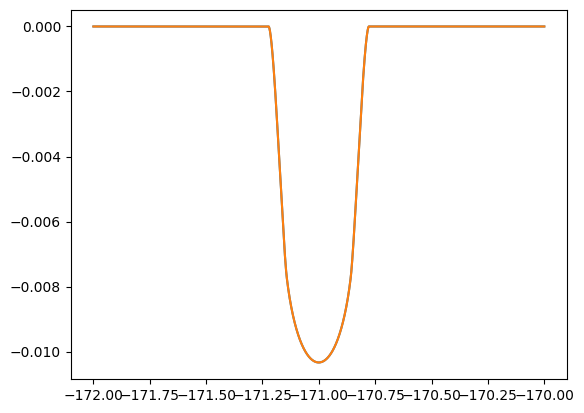

In [24]:
plt.plot(t1,flux3)
plt.plot(t1,flux)

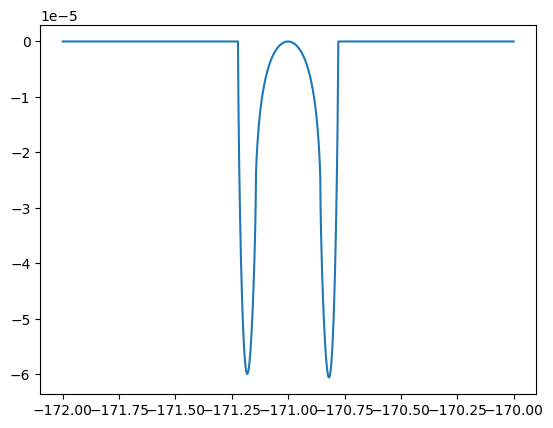

In [25]:
plt.plot(t1,(flux3-flux)/0.001)

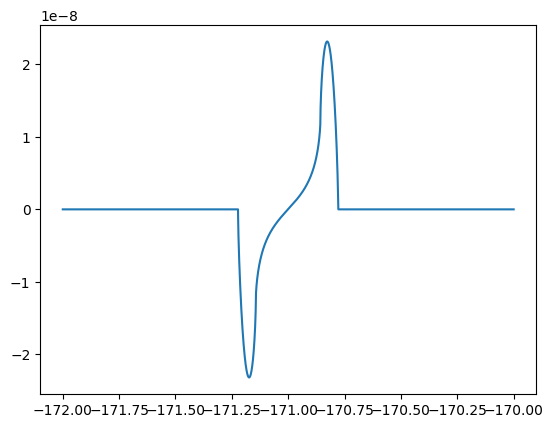

In [26]:
plt.plot(t1,grad['P1'])

In [27]:
#What about the expression I have for dfdP?
dfdP = grad['P1'] - grad['T']*dTdp(pp,ap,wp,ep,ip) - grad['t0']*dt0dp(tp,ep,pp,wp)

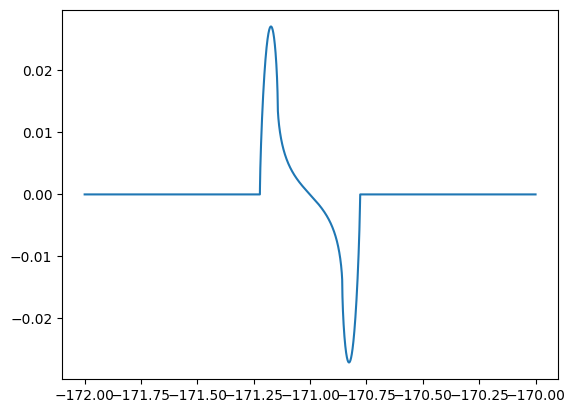

In [28]:
plt.plot(t1,dfdP)

In [29]:
#How about this expression?
dfdP = grad['T']*dTdp(pp,ap,wp,ep,ip)

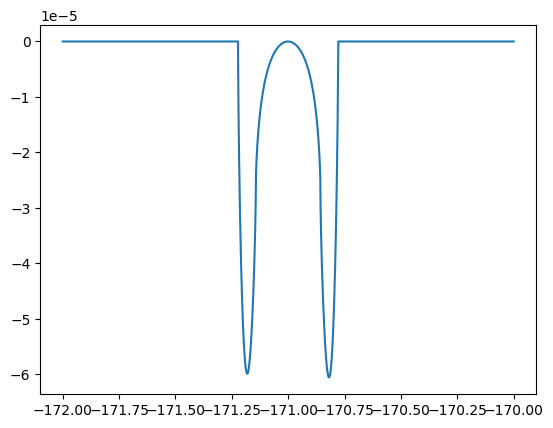

In [30]:
plt.plot(t1,dfdP)

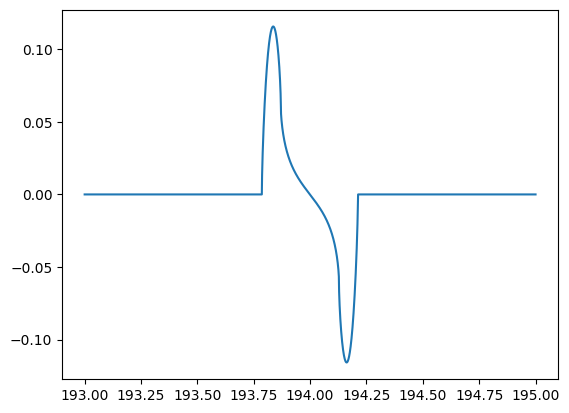

In [31]:
#is this expression true for the second transit?
po = gf.orbits.PrimaryOrbit(new_T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t2 = np.linspace(-172+p1,-170+p1,10000)
flux, grad = sys.lightcurve(t2, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)
dfdP = grad['P1'] - grad['T']*dTdp(pp,ap,wp,ep,ip) - grad['t0']*dt0dp(tp,ep,pp,wp)
plt.plot(t2,grad['P1'])

In [32]:
#Tests of all derivatives

In [33]:
#list of all derivs
list(grad.keys())

['T',
 't0',
 'b1',
 'r1',
 'phi',
 'm2',
 'r2',
 'a2',
 'b2',
 'P1',
 'P2',
 'e1cosw1',
 'e2cosw2',
 'e1sinw1',
 'e2sinw2',
 'o2',
 'u1',
 'u2']

In [26]:
#T
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T+1e-8,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#plt.plot(t,(flux2-flux)/1e-8)
#plt.plot(t,grad['T'])
grad

{'T': array([-0., -0., -0., ..., -0., -0., -0.]),
 't0': array([0., 0., 0., ..., 0., 0., 0.]),
 'b1': array([-0., -0., -0., ..., -0., -0., -0.]),
 'r1': array([0., 0., 0., ..., 0., 0., 0.]),
 'phi': array([nan, nan, nan, ..., nan, nan, nan]),
 'm2': array([0., 0., 0., ..., 0., 0., 0.]),
 'r2': array([0., 0., 0., ..., 0., 0., 0.]),
 'a2': array([0., 0., 0., ..., 0., 0., 0.]),
 'b2': array([nan, nan, nan, ..., nan, nan, nan]),
 'P1': array([0., 0., 0., ..., 0., 0., 0.]),
 'P2': array([nan, nan, nan, ..., nan, nan, nan]),
 'e1cosw1': array([0., 0., 0., ..., 0., 0., 0.]),
 'e2cosw2': array([nan, nan, nan, ..., nan, nan, nan]),
 'e1sinw1': array([0., 0., 0., ..., 0., 0., 0.]),
 'e2sinw2': array([nan, nan, nan, ..., nan, nan, nan]),
 'o2': array([nan, nan, nan, ..., nan, nan, nan]),
 'u1': array([0., 0., 0., ..., 0., 0., 0.]),
 'u2': array([0., 0., 0., ..., 0., 0., 0.])}

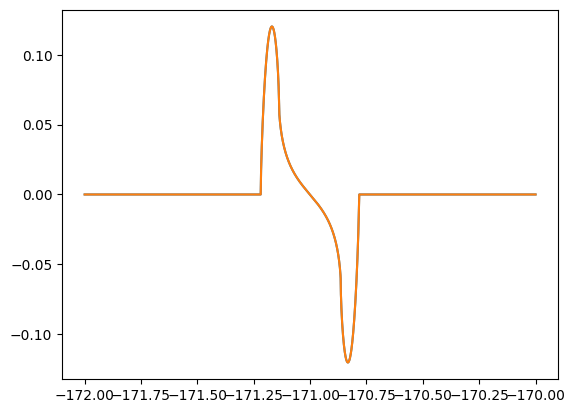

In [13]:
#t0
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0+1e-8,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['t0'])

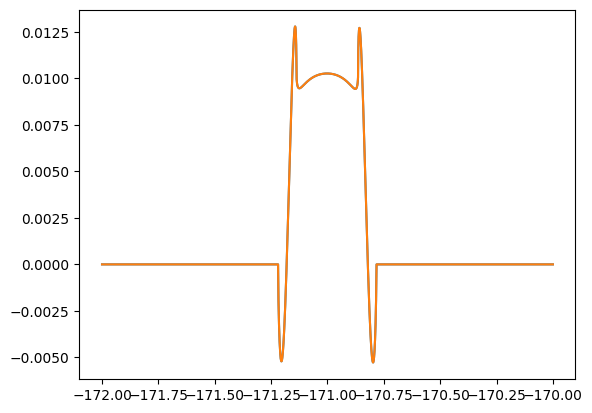

In [14]:
#b1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1+1e-8)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['b1'])

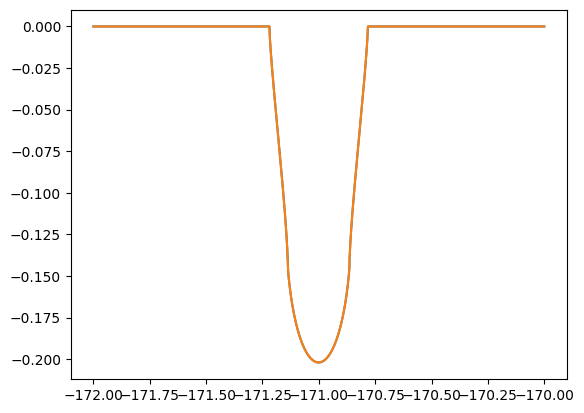

In [15]:
#r1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1']+1e-8, new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['r1'])

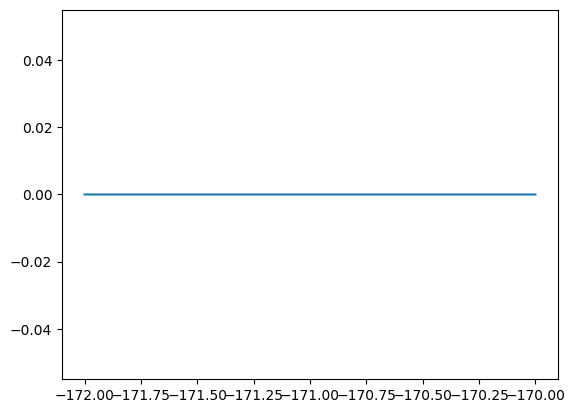

In [16]:
#phi
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi+1e-8,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['phi'])

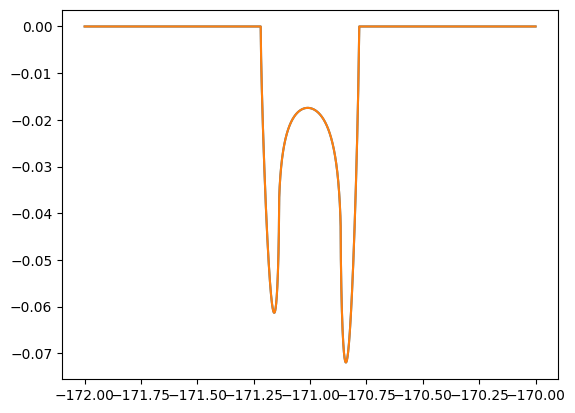

In [17]:
#m2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2+1e-8)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['m2'])

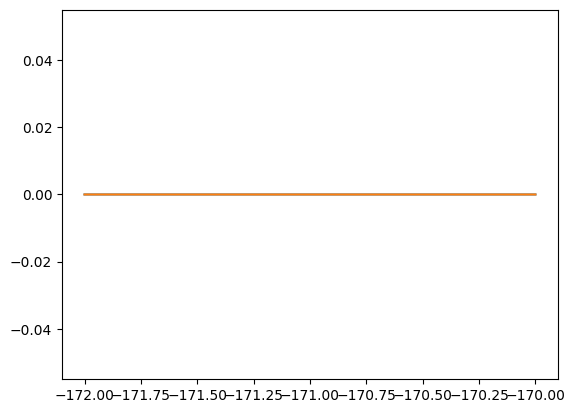

In [18]:
#r2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2']+1e-8, grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['r2'])

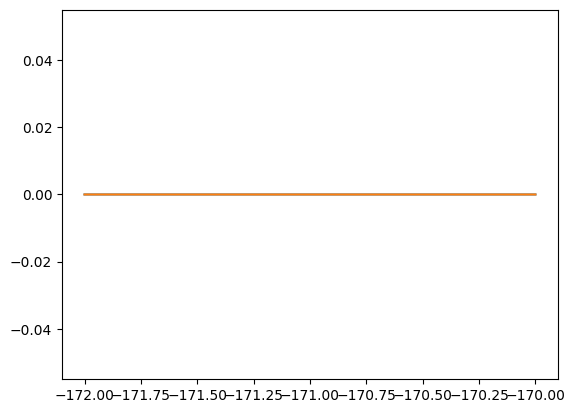

In [19]:
#a2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2+1e-8,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['a2'])

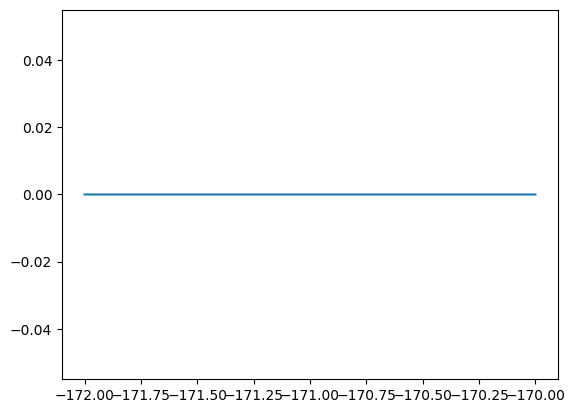

In [22]:
#b2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2+1e-6,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-6)
plt.plot(t,grad2['b2'])

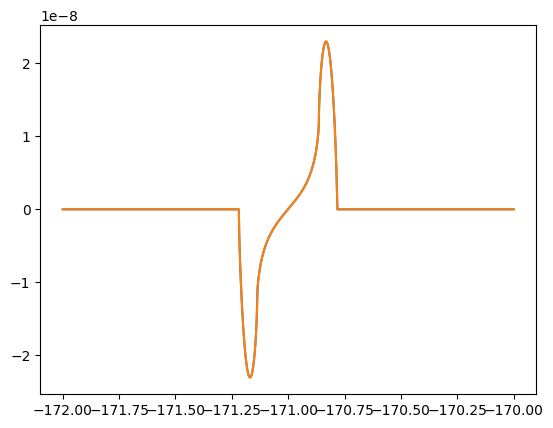

In [23]:
#p1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+0.1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/0.1)
plt.plot(t,grad['P1'])

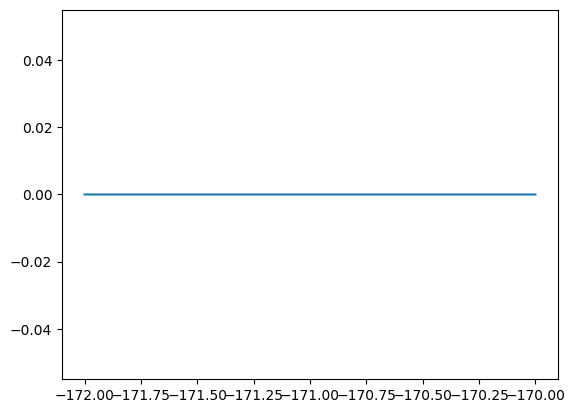

In [24]:
#p2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2+1e-8,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

dfdP2 = grad['P2'] - grad['phi']*dphidp(tm,em,pm,wm)

plt.plot(t,(flux2-flux)/1e-8)
#plt.plot(t,grad['P2'])
plt.plot(t,grad['P2'])

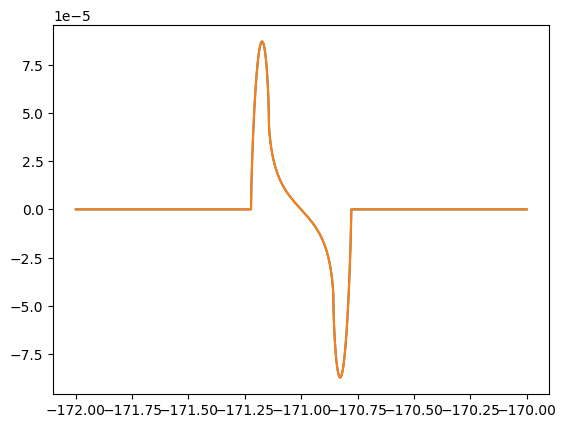

In [9]:
#e1cosw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw+1e-6,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-6)
plt.plot(t,grad['e1cosw1'])

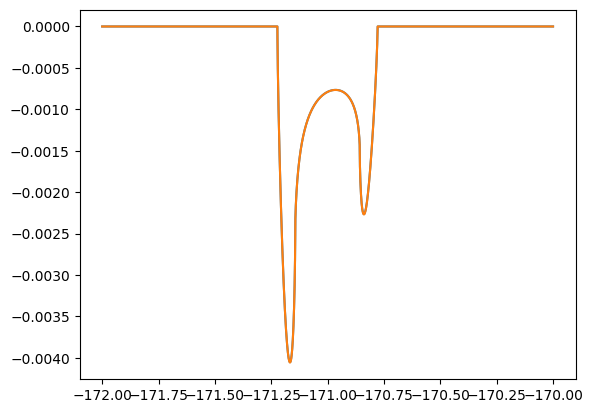

In [10]:
#e2cosw2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw+1e-4,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-4)
plt.plot(t,grad['e2cosw2'])

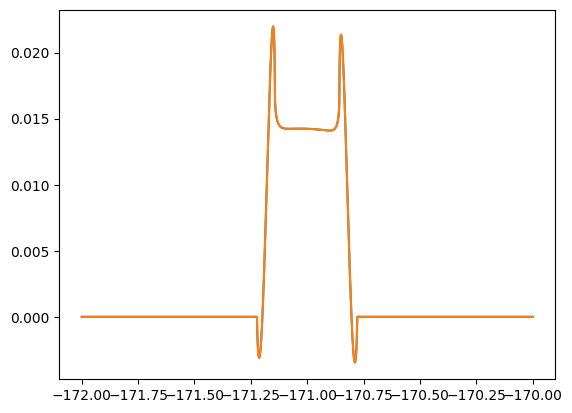

In [11]:
#e1sinw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw+1e-8,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['e1sinw1'])

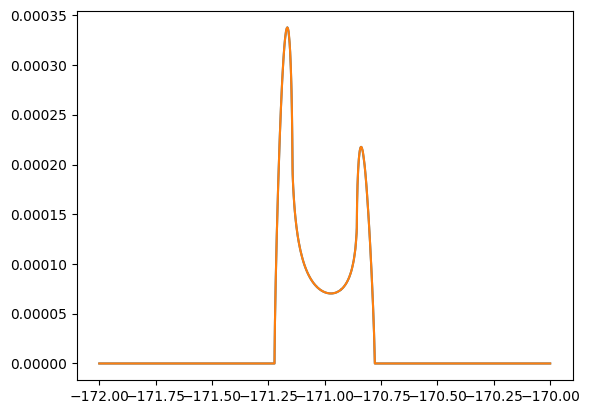

In [12]:
#e2sinw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw+1e-8,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['e2sinw2'])

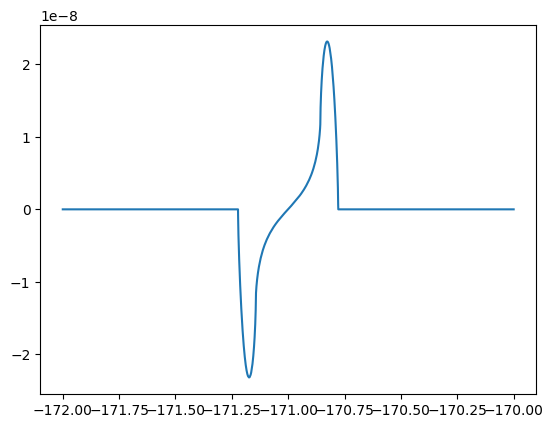

In [32]:
#p1 derivative for first transit
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+1e-3,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-3)


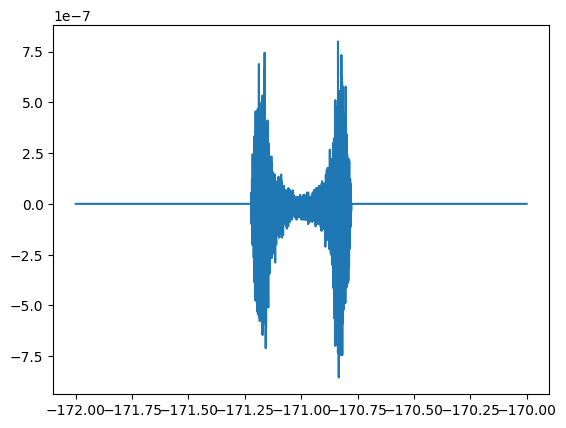

In [33]:
#p1 derivative first transit with very small finite diff
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-172,-170,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+1e-8,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-172,-170,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)


In [53]:
#derivative tests with e1 and e2 = 0

In [29]:
old = {
'ap':215.0,     #semi-major axis
'tp':-91.25,    #time of periastron passage
'ep':0.1,       #eccentricity
'pp':365,       #orbital period
'wp':0.1*np.pi / 180,    #argument of periastron
'ip':89.8 * np.pi / 180,   #inclination
'am':2,
'tm': -4.2,
'em' : 0.1,
'pm' : 8,
'om' :90 * np.pi / 180,    #longitude of asending node (in radians)
'wm' : -90 * np.pi / 180,
'im' : 90.0 * np.pi / 180,
'mm' : 0.0,    #moon/planet mass ratio
'rp' : 0.1,
'rm' : 0.0,
'u1' : 0.5,
'u2' : 0.3
}

ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = old.values()

new = {
    'T':def_T(ep,pp,wp,ap,ip),
    't0':t0(ep,wp,pp,tp),
    'b1':b(ap,ip,ep,wp),
    'r1':r1,
    'phi':phi(tm,pm),
    'm2':mm,
    'r2':r2,
    'a2':am,
    'b2':b(am,im,em,wm),
    'P1':pp,
    'P2':pm,
    'e1cosw1':ep*np.cos(wp),
    'e2cosw2':em*np.cos(wm),
    'e1sinw1':ep*np.sin(wp),
    'e2sinw2':em*np.sin(wm),
    'o2':om,
    'u1':u1,
    'u2':u2

}

T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = new.values()


In [30]:
new

{'T': 0.359889361609616,
 't0': -171.0009714536869,
 'b1': 0.7428555010526576,
 'r1': 0.1,
 'phi': -3.2986722862692828,
 'm2': 0.0,
 'r2': 0.0,
 'a2': 2,
 'b2': 1.3471114790620885e-16,
 'P1': 365,
 'P2': 8,
 'e1cosw1': 0.09999984769132877,
 'e2cosw2': 6.123233995736766e-18,
 'e1sinw1': 0.0001745328365898309,
 'e2sinw2': -0.1,
 'o2': 1.5707963267948966,
 'u1': 0.5,
 'u2': 0.3}

In [31]:
nold = {
    'ap':a1(p1,b1,T,e1cosw,e1sinw),     #semi-major axis
    'tp':t1(my_t0,p1,e1cosw,e1sinw),    #time of periastron passage
    'ep':ecc(e1cosw,e1sinw),       #eccentricity
    'pp':p1,       #orbital period
    'wp':omega(e1cosw,e1sinw),    #argument of periastron
    'ip':i1(b1,p1,T,e1cosw,e2cosw),   #inclination
    'am':a2,
    'tm': t2(my_phi,p2),
    'em' : ecc(e2cosw,e2sinw),
    'pm' : p2,
    'om' :o2,    #longitude of asending node (in radians)
    'wm' : omega(e2cosw,e2sinw),
    'im' : i2(b2,a2,e2cosw,e2sinw),
    'mm' : m2,    #moon/planet mass ratio
    'rp' : r1,
    'rm' : r2,
    'u1' : u1,
    'u2' : u2
}
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = nold.values()

In [36]:
old

{'ap': 215.0,
 'tp': -91.25,
 'ep': 0.1,
 'pp': 365,
 'wp': 0.0017453292519943296,
 'ip': 1.5673056682909077,
 'am': 2,
 'tm': -4.2,
 'em': 0.1,
 'pm': 8,
 'om': 1.5707963267948966,
 'wm': -1.5707963267948966,
 'im': 1.5707963267948966,
 'mm': 0.0,
 'rp': 0.1,
 'rm': 0.0,
 'u1': 0.5,
 'u2': 0.3}

In [37]:
nold

{'ap': 214.99999999999997,
 'tp': -91.25,
 'ep': 0.1,
 'pp': 365,
 'wp': 0.0017453292519943294,
 'ip': 1.5673068865881923,
 'am': 2,
 'tm': -4.2,
 'em': 0.1,
 'pm': 8,
 'om': 1.5707963267948966,
 'wm': -1.5707963267948966,
 'im': 1.5707963267948966,
 'mm': 0.0,
 'rp': 0.1,
 'rm': 0.0,
 'u1': 0.5,
 'u2': 0.3}

In [32]:
#original value vs recovered value
old['tp'],nold['tp']

(-91.25, -91.25)

In [33]:
nold['wp']

0.0017453292519943294

/home/pcosta/gefera/gefera/systems.py:287: RuntimeWarning: divide by zero encountered in divide
  dfde1cos = (grad['w1']-dfdT*dTdw(pp,ap,wp,ep,ip)-dfdt0*dt0dw(tp,ep,pp,wp)-dfdb1*dbdw(ap,ip,ep,wp)-(grad['e1']-dfdT*dTde(pp,ap,wp,ep,ip)-dfdt0*dt0de(tp,ep,pp,wp)-dfdb1*dbde(ap,ip,ep,wp))/(desinwde(ep,wp)))/(decoswdw(ep,wp)-decoswde(ep,wp)*desinwdw(ep,wp)/desinwde(ep,wp))
/home/pcosta/gefera/gefera/systems.py:287: RuntimeWarning: invalid value encountered in divide
  dfde1cos = (grad['w1']-dfdT*dTdw(pp,ap,wp,ep,ip)-dfdt0*dt0dw(tp,ep,pp,wp)-dfdb1*dbdw(ap,ip,ep,wp)-(grad['e1']-dfdT*dTde(pp,ap,wp,ep,ip)-dfdt0*dt0de(tp,ep,pp,wp)-dfdb1*dbde(ap,ip,ep,wp))/(desinwde(ep,wp)))/(decoswdw(ep,wp)-decoswde(ep,wp)*desinwdw(ep,wp)/desinwde(ep,wp))
/home/pcosta/gefera/gefera/grad_reparam.py:150: RuntimeWarning: invalid value encountered in scalar divide
  return -esinw/(ecosw**2+esinw**2)
/home/pcosta/gefera/gefera/grad_reparam.py:147: RuntimeWarning: invalid value encountered in scalar divide
  return ecos

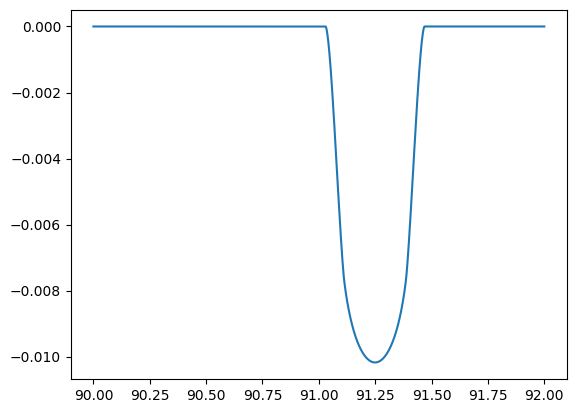

In [32]:
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90,92,10000)
flux, grad = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
plt.plot(t,flux)

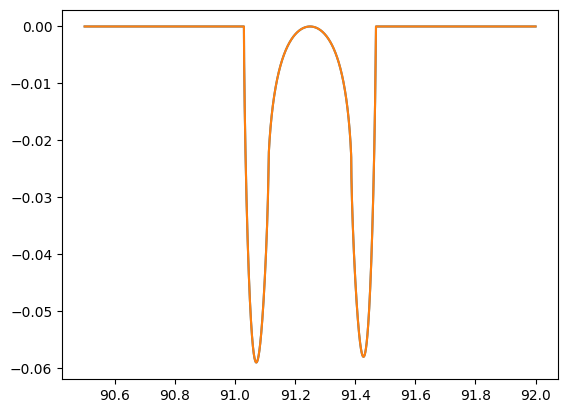

In [33]:
#T
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T+1e-8,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['T'])

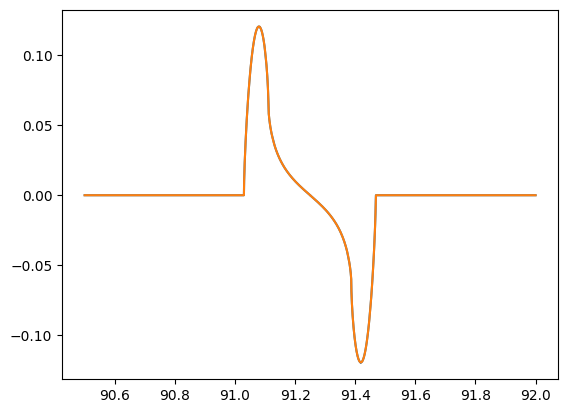

In [34]:
#t0
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0+1e-8,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['t0'])

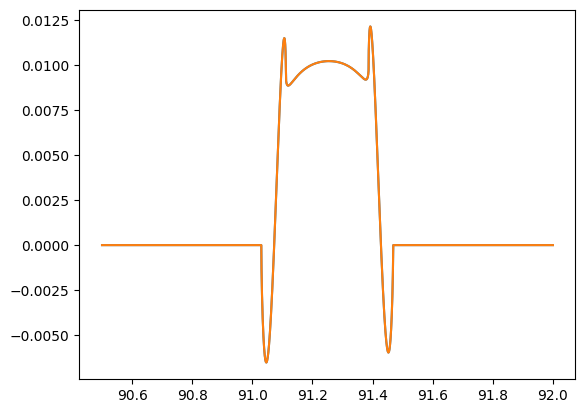

In [35]:
#b1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1+1e-8)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['b1'])

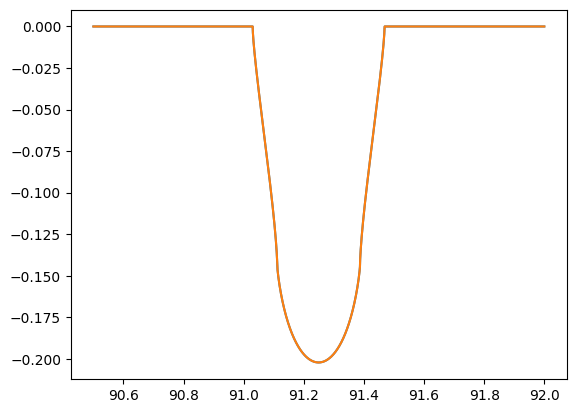

In [36]:
#r1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1']+1e-8, new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['r1'])

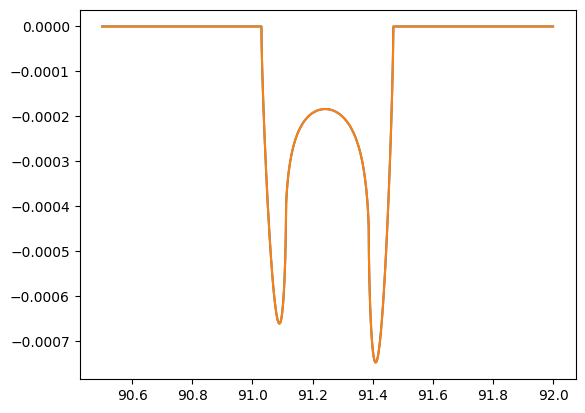

In [37]:
#phi
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi+1e-8,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['phi'])

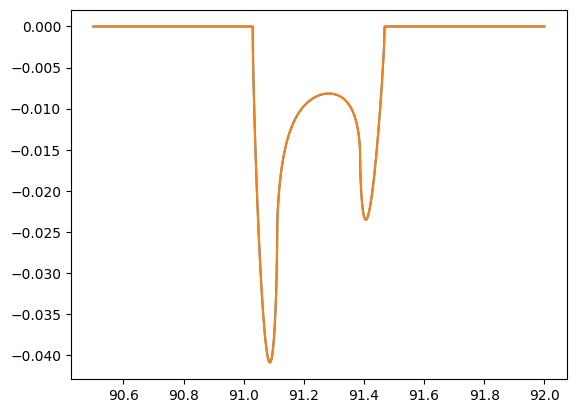

In [38]:
#m2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2+1e-8)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['m2'])

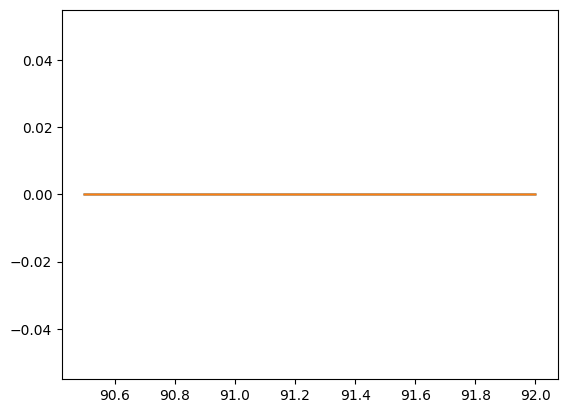

In [39]:
#r2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2']+1e-8, grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['r2'])

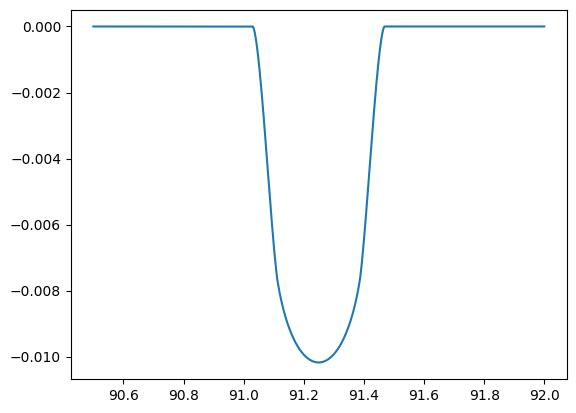

In [40]:
plt.plot(t,flux)

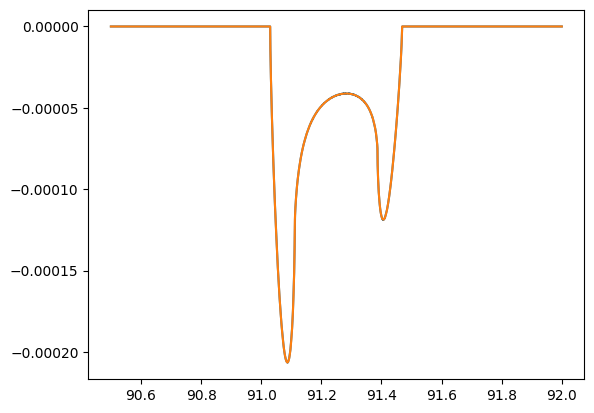

In [41]:
#a2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2+1e-8,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['a2'])

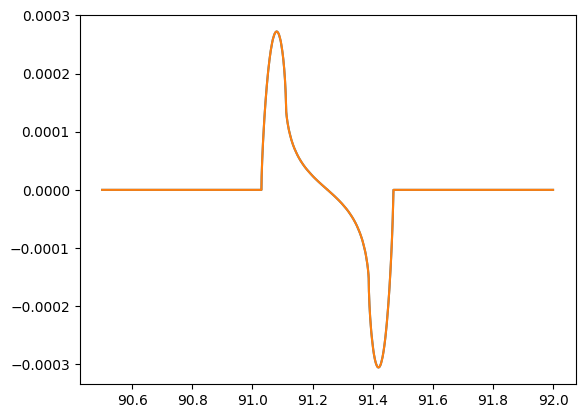

In [42]:
#b2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2+1e-8,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['b2'])

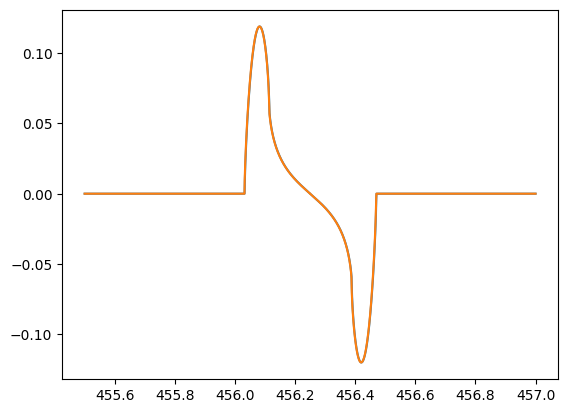

In [43]:
#p1
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5+365,92+365,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+0.001,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5+365,92+365,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/0.001)
plt.plot(t,grad['P1'])

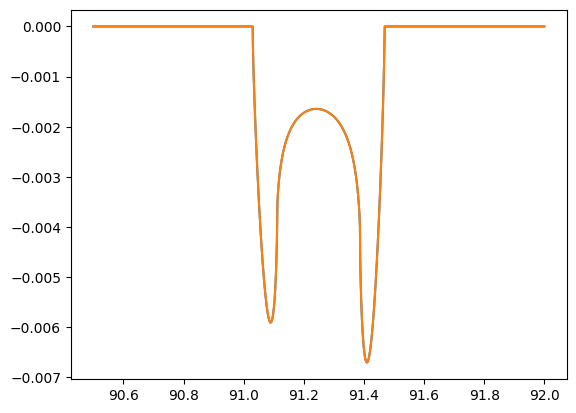

In [44]:
#p2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(90.5,92,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2+1e-8,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(90.5,92,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['P2'])


In [25]:
1+1/np.tan(Pi/2)**2

1.0

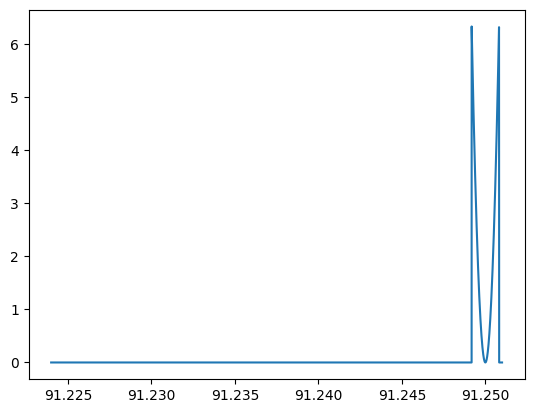

In [48]:
#e1cosw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(91.224,91.251,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw+1e-8,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(91.224,91.251,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
plt.plot(t,grad['e1cosw1'])

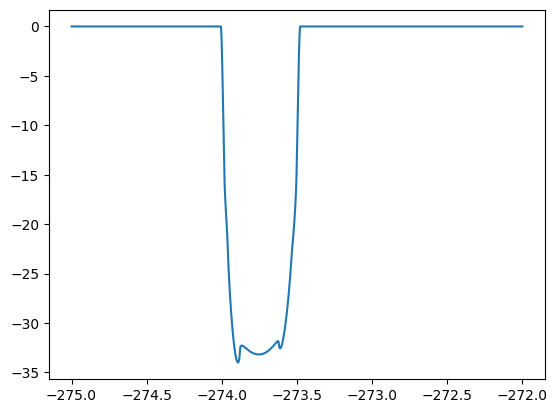

In [19]:
#e2cosw2
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-275,-272,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw+1e-4,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-275,-272,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-4)
#plt.plot(t,grad['e2cosw2'])

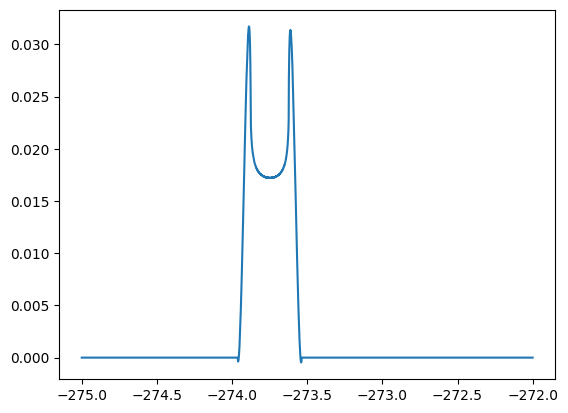

In [20]:
#e1sinw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-275,-272,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw+1e-8,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-275,-272,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
#plt.plot(t,grad['e1sinw1'])

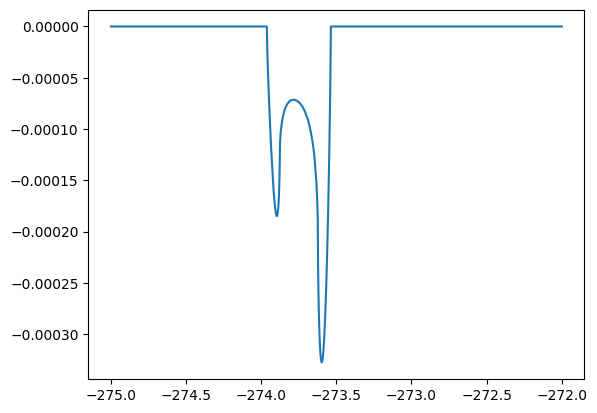

In [21]:
#e2sinw
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-275,-272,10000)
flux, grad = sys.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

#finite diff
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw+1e-8,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-275,-272,10000)
flux2, grad2 = sys2.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

plt.plot(t,(flux2-flux)/1e-8)
#plt.plot(t,grad['e2sinw2'])

In [26]:
1/np.sqrt(1+np.tan(omega(e1cosw,e1sinw))**2)

6.123233995736766e-17